In [1]:
# Autor: Elvis do A. Soares
# Github: @elvissoares
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','notebook'])

# Dinâmica Newtoniana e Integradores

Sabemos que a 2ª Lei de Newton para um corpo qualquer é dade pela EDO de 2ª ordem na forma 

$$ m\frac{d^2\boldsymbol{r}}{d t^2} = \boldsymbol{F}_R $$

sendo $m$ a massa do corpo e $\boldsymbol{F}_R$ a força resultante que atua sobre o corpo.

# 1. Oscilador Harmônico Simples (OHS)
Nesse caso temos que 

$$\boldsymbol{F}_R = - k \boldsymbol{x}$$

levando em conta só o movimento em $x$ teremos que 

$$m\frac{d^2 x}{dt^2} = - k x$$


que pode ser quebrado em duas EDOs de 1ª ordem

$$\frac{d x}{dt} = v, \qquad \text{e} \qquad\frac{d v}{dt} = - \omega_0^2 x$$

definimos, usualmente, $\omega_0 = \sqrt{k/m}$.

Cuja solução analítica é 

$$ x(t) = x_0 \cos(\omega_0 t) + (v_0/\omega_0) \sin(\omega_0 t)$$


In [2]:
# Função que retorna a solução analítica do OHS
def ohs_analitica(u0,ti,tf,h,args):
    t = np.arange(ti,tf,h)
    omega0 = args
    x0,v0 = u0
    return np.array([x0*np.cos(omega0*t)+(v0/omega0)*np.sin(omega0*t),-x0*omega0*np.sin(omega0*t) + v0*np.cos(omega0*t)]), t

## Método de Euler Explícito

Para qualquer sistema de EDOs de 1ª ordem temos que 

$$ \frac{d \boldsymbol{u}}{dt} = \boldsymbol{f}(t)$$

de modo que ao integrarmos de $t$ até $t+h$, teremos que 

$$\int_t^{t+h} \frac{d \boldsymbol{u}}{dt} dt = \boldsymbol{u}_{t+h} - \boldsymbol{u}_t = \int_t^{t+h} \boldsymbol{f}(t') dt' $$

E usando a aproximação de Euler, temos que $\int_t^{t+h} \boldsymbol{f}(t') dt' = \boldsymbol{f}_t h$

$$ \boldsymbol{u}_{t+h} = \boldsymbol{u}_t + \boldsymbol{f}_t h$$

In [3]:
# Função geral que implementa o integrador de Euler para EDOs genéricas
def solver_Euler(u0,ti,tf,h,args,edo):
    t = np.arange(ti,tf+h,h)
    u = np.zeros((u0.size,t.size))
    u[:,0] = u0
    for i in range(1,t.size):
        dudt = edo(u[:,i-1],t[i-1],args)
        u[:,i] = u[:,i-1] + dudt*h
    return u,t

In [4]:
# Função para definição da EDO do problema do OHS
def edo_ohs(u,t,args):
    omega0 = args
    x,v = u
    dudt = np.array([v, -omega0**2*x])
    return dudt

In [5]:
# Condição Inicial
x0 = 1.0
v0 = 0.0

# Array de condições iniciais
u0 = np.array([x0,v0])

In [6]:
# Parâmetros necessários para a EDO
omega0 = 1.0

In [7]:
# Cria o array que armazena a solução numérica usando o método de Euler
sol_ohs_euler, t = solver_Euler(u0,ti=0.0,tf=30.0,h=0.01,args=omega0,edo=edo_ohs)

# Formato do output
# x(t) = sol_ohs_euler[0]
# v(t) = sol_ohs_euler[1]

In [8]:
# Cria o array que armazena a solução analítica
sol_ohs_analitica, t_analitico = ohs_analitica(u0,ti=0.0,tf=30.0,h=0.01,args=omega0)

(-10.0, 10.0)

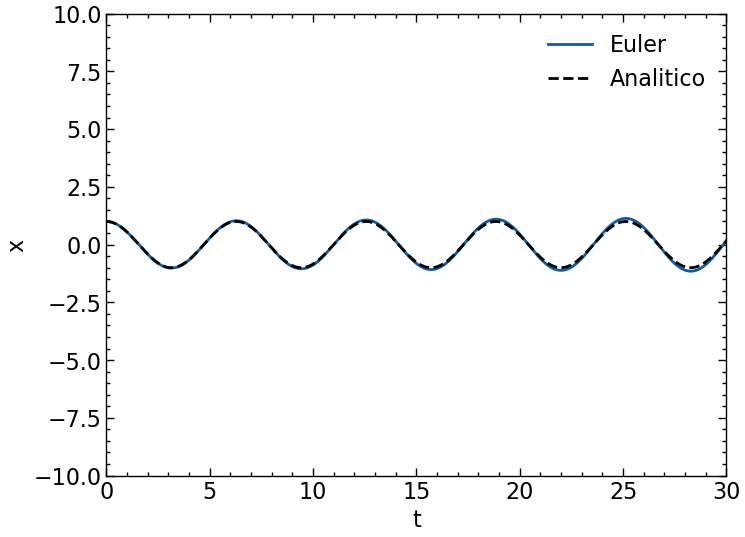

In [9]:
# Grafico que compara solução numérica com solução analítica
plt.plot(t,sol_ohs_euler[0],label='Euler')
plt.plot(t_analitico,sol_ohs_analitica[0],label='Analitico',ls='--',color='k')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('x')
plt.xlim(t[0],t[-1])
plt.ylim(-10,10)

Energia do Oscilador 

$$ E = \frac{m v^2}{2} + \frac{k x^2}{2}$$

$$ 2 E /m = v^2 + \omega_0^2 x^2

(0.0, 2.0)

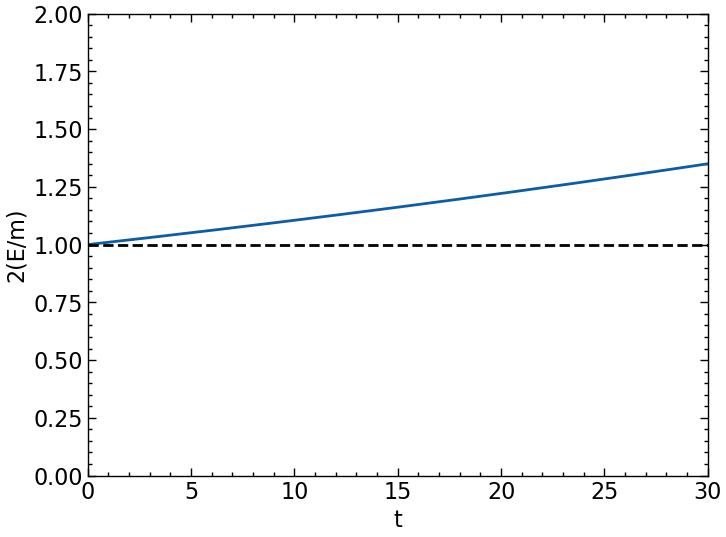

In [10]:
plt.plot(t,sol_ohs_euler[1]**2+omega0**2*sol_ohs_euler[0]**2,label='Euler')
plt.axhline(v0**2+omega0**2*x0**2,xmin=0,xmax=t.max(),ls='--',color='k')
plt.xlabel('t')
plt.ylabel('2(E/m)')
plt.xlim(0,t.max())
plt.ylim(0,2)

## Método de Runge-Kutta

Um método baseado em passos intermediários para cálculo da EDO. Seja a EDO 

$$\frac{d y}{d t} = f(y,t)$$

com condição inicial dada por $y(t_n) = y_n$, de modo que  

$$k_1 = f(y_n,t_n)$$
$$k_2 = f(y_n+\frac{h}{2}k_1, t_n + \frac{h}{2})$$
$$k_3 = f(y_n+\frac{h}{2}k_2, t_n + \frac{h}{2})$$
$$k_4 = f(y_n+h k_3, t_n + h)$$

com o passo final sendo 

$$y_{n+1} = y_n + \frac{h}{6}(k_1+2k_2+2k_3+k_4)$$

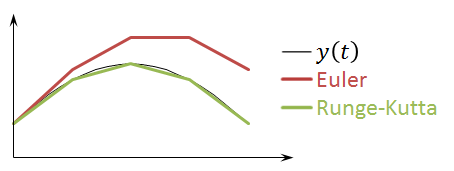

Ref: https://pt.wikipedia.org/wiki/M%C3%A9todo_de_Runge-Kutta

In [11]:
def solver_RK4(u0,ti,tf,h,args,edo):
    t = np.arange(ti,tf+h,h)
    u = np.zeros((u0.size,t.size))
    u[:,0] = u0
    for i in range(1,t.size):
        h = (t[i]-t[i-1])
        k1 = edo(u[:,i-1],t[i-1],args)
        k2 = edo(u[:,i-1]+0.5*h*k1,t[i-1]+0.5*h,args)
        k3 = edo(u[:,i-1]+0.5*h*k2,t[i-1]+0.5*h,args)
        k4 = edo(u[:,i-1]+h*k3,t[i-1]+h,args)
        u[:,i] = u[:,i-1] + (h/6)*(k1+2*k2+2*k3+k4)
    return u, t

In [12]:
# Resolvendo o problema para os instantes t
sol_ohs_rk4,_ = solver_RK4(u0,ti=0.0,tf=30.0,h=0.01,args=omega0,edo=edo_ohs)

Text(0, 0.5, 'x')

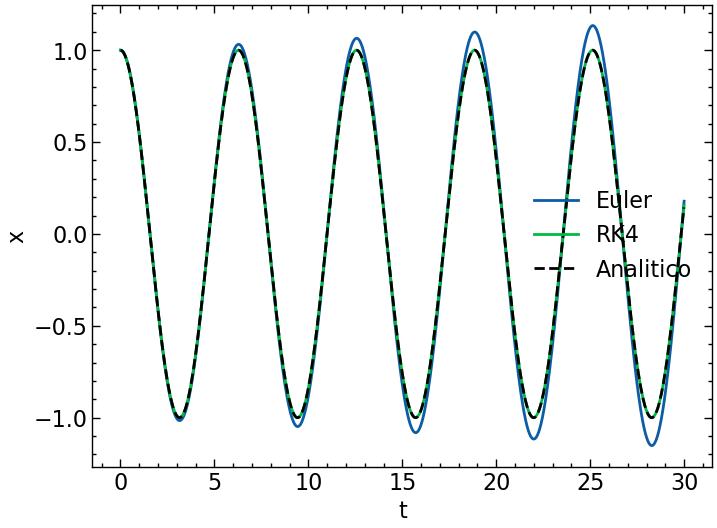

In [13]:
plt.plot(t,sol_ohs_euler[0],label='Euler')
plt.plot(t,sol_ohs_rk4[0],label='RK4')
plt.plot(t_analitico,sol_ohs_analitica[0],label='Analitico',ls='--',color='k')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('x')
# plt.xlim(left=0)
# plt.ylim(bottom=0)

(0.0, 2.0)

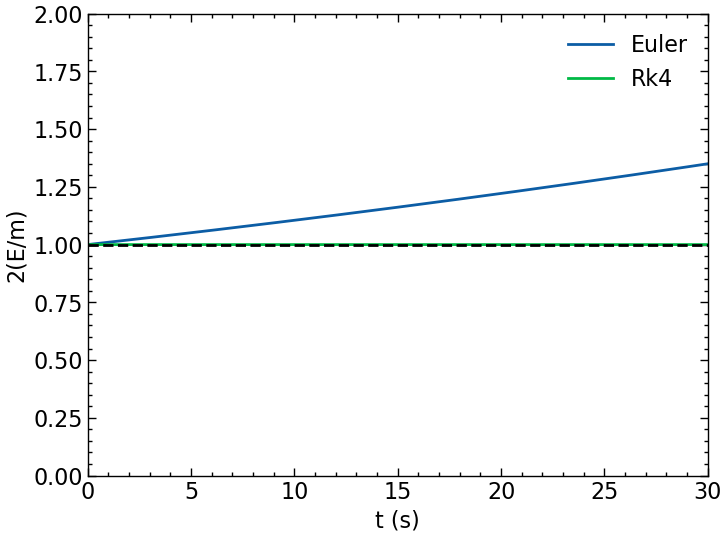

In [14]:
plt.plot(t,sol_ohs_euler[1]**2+omega0**2*sol_ohs_euler[0]**2,label='Euler')
plt.plot(t,sol_ohs_rk4[1]**2+omega0**2*sol_ohs_rk4[0]**2,label='Rk4')
plt.axhline(v0**2+omega0**2*x0**2,xmin=0,xmax=t.max(),ls='--',color='k')
plt.legend(loc='best')
plt.xlabel('t (s)')
plt.ylabel('2(E/m)')
plt.xlim(0,t.max())
plt.ylim(0,2)

### Espaço de Fase

Gráfico de v(t) versus x(t)

Text(0.5, 0, 'x')

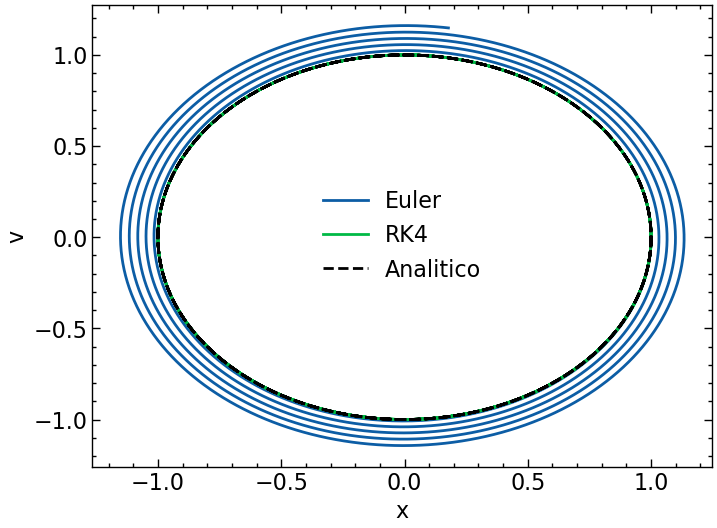

In [15]:
plt.plot(sol_ohs_euler[0],sol_ohs_euler[1],label='Euler')
plt.plot(sol_ohs_rk4[0],sol_ohs_rk4[1],label='RK4')
plt.plot(sol_ohs_analitica[0],sol_ohs_analitica[1],label='Analitico',ls='--',color='k')
plt.legend(loc='best')
plt.ylabel('v')
plt.xlabel('x')

In [16]:
# Calculando o erro dependendo do passo de tempo h
harray = np.array([1e-4,0.001,0.01,0.1,1.0])

err_euler = np.zeros_like(harray)
err_rk4 = np.zeros_like(harray)

for i in range(harray.size): 
    sol_ohs_euler,_ = solver_Euler(u0,ti=0.0,tf=30.0,h=harray[i],args=omega0,edo=edo_ohs)
    sol_ohs_rk4,_ = solver_RK4(u0,ti=0.0,tf=30.0,h=harray[i],args=omega0,edo=edo_ohs)

    err_euler[i] = np.abs(sol_ohs_euler[0].max()-sol_ohs_analitica[0].max())/sol_ohs_analitica[0].max()
    err_rk4[i] = np.abs(sol_ohs_rk4[0].max()-sol_ohs_analitica[0].max())/sol_ohs_analitica[0].max()

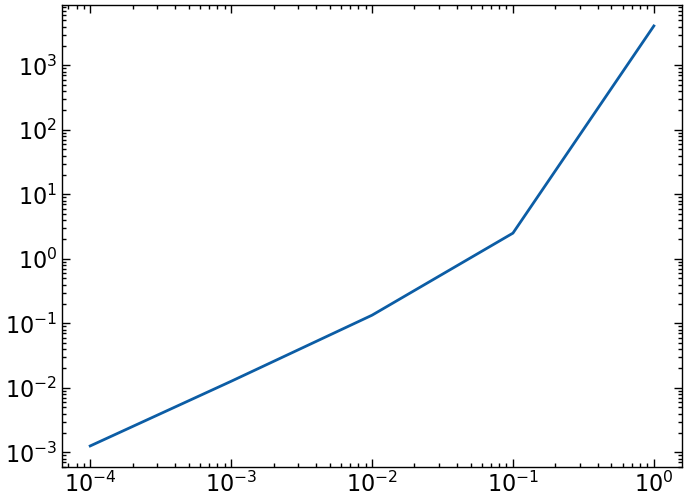

In [17]:
plt.yscale('log')
plt.xscale('log')
plt.plot(harray,err_euler,label='Euler')
plt.plot(harray,err_rk4,label='RK4')

### Testando Performance

In [18]:
%timeit -n 20 solver_Euler(u0,ti=0.0,tf=30.0,h=0.1,args=omega0,edo=edo_ohs)

689 μs ± 17.5 μs per loop (mean ± std. dev. of 7 runs, 20 loops each)


In [19]:
%timeit -n 20 solver_RK4(u0,ti=0.0,tf=30.0,h=0.1,args=omega0,edo=edo_ohs)

3.28 ms ± 107 μs per loop (mean ± std. dev. of 7 runs, 20 loops each)


# 2. Oscilador Harmônico Amortecido (OHA)

Uma EDO do tipo

$$ m\frac{d^2 x}{d t^2} = -b\frac{d x}{d t} - k x $$

que re-escrita fica como 

$$\frac{d x}{d t} = v \qquad \text{e} \qquad \frac{d v}{d t} = -\gamma v - \omega_0^2 x$$


In [20]:
# Função para definição da EDO
def edo_oha(u,t,args):
    gamma, omega0 = args
    x, v = u
    return np.array([v,-gamma*v-omega0**2*x])

In [21]:
gamma = 0.1
omega0 = 1.0

u0 = np.array([2.0,0.0])

In [22]:
sol_oha_vv_gamma0,t = solver_RK4(u0,ti=0.0,tf=50.0,h=0.01,args=[0.0,omega0],edo=edo_oha)
sol_oha_vv,t = solver_RK4(u0,ti=0.0,tf=50.0,h=0.01,args=[gamma,omega0],edo=edo_oha)

Text(0, 0.5, 'x')

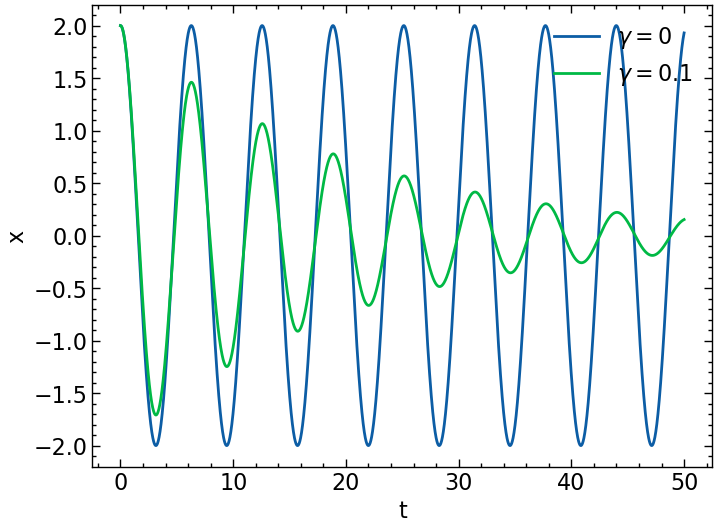

In [23]:
plt.plot(t,sol_oha_vv_gamma0[0],label=r'$\gamma=0$')
plt.plot(t,sol_oha_vv[0],label=r'$\gamma=0.1$')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('x')

Text(0, 0.5, 'v')

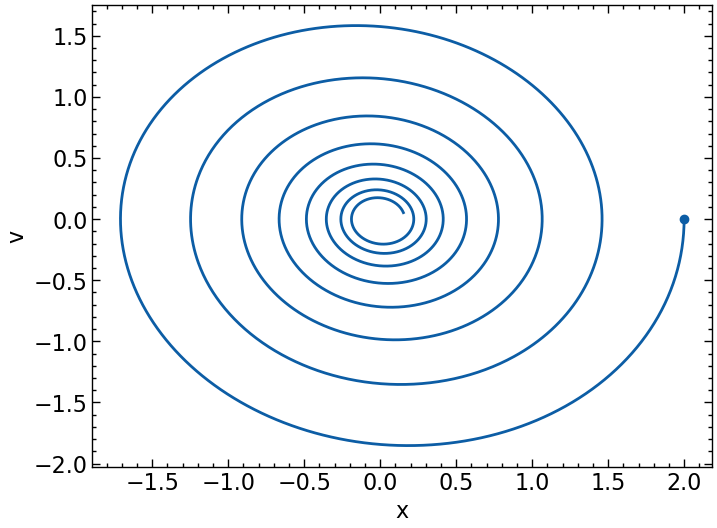

In [24]:
plt.scatter(*u0)
plt.plot(sol_oha_vv[0],sol_oha_vv[1])
plt.xlabel('x')
plt.ylabel('v')